<a href="https://colab.research.google.com/github/duncan09/ExData_Plotting1/blob/master/sent_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# this is a sentiment analysis test with python

In [3]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.style.use("fivethirtyeight")

In [4]:
#Get the twitter api credentials
consumerKey='DHsanX4MwiYjyDEvupdH4eIsp'
consumerSecret='0B8nibUyUwXTHgyq2S1l8xsHOuaCK4cfnA3HMBJG4BDmXFS7or'
bearerToken='AAAAAAAAAAAAAAAAAAAAANoaIgEAAAAAdBPXOip2EQWvOJNhK1j7GR8He4g%3DyEJUyEO1I30UBuNsn16pfxzZQKsFQhbbOyRTUeAfYoQo95yz4r'
accessToken='2858930885-9H3ykTd20iYYDA57ELEw9rB9fONIH2Uq2rVZ4gp'
accessTokenSecret='EW2GHerN2UQxCjuqPDrYnXXLRmR16VEk9EgQiUjljbU8e'

In [5]:
#create the authentication object
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)

#set the access
authenticate.set_access_token(accessToken,accessTokenSecret)

#create the api object while passing in the oauth information
api=tweepy.API(authenticate)


In [6]:
#Extract 1000 tweets from the user
posts=api.user_timeline(screen_name='BillGates',count=1000,lang='en',tweet_mode='extended')

#show the last 5 tweets
print("Show the 5 recent tweets:\n")
for tweet in posts[0:5]:
  print(tweet.full_text+"\n")

Show the 5 recent tweets:

This honor is well deserved. COVID-19 is not just a health crisis—it is also now a food crisis, and @WFP is there to respond. I’m inspired by the thousands of people in the organization who have committed their lives to fighting hunger. https://t.co/WC5bAFO5FH

For the last 25 years, Dr. Firdausi Qadri, an immunologist and infectious disease researcher in Bangladesh, has been working to protect entire communities from cholera epidemics. https://t.co/F2pQiIYqry

I’m excited to see this kind of innovation. Detecting and predicting outbreaks earlier is critical to preventing epidemics. https://t.co/ZadPiUS73z

The only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. By making sure poor countries are equipped to stop this disease, wealthy countries will help themselves and bring this crisis to an end sooner. https://t.co/CzFHuwdPcS

Understanding this concept can help us measure our progress toward eliminating carbon emissions and

In [7]:
#Create a dataframe with a column called tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=["tweets"])

#Show the first 5 rows
print(df.head())

                                              tweets
0  This honor is well deserved. COVID-19 is not j...
1  For the last 25 years, Dr. Firdausi Qadri, an ...
2  I’m excited to see this kind of innovation. De...
3  The only way to eliminate the threat of COVID-...
4  Understanding this concept can help us measure...


In [9]:
#Clean up text
#create a function to clean up dataframe

def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text) #removing the mentions
  text=re.sub(r'#','',text) # removing the hashtag
  text=re.sub(r'RT[\s]+','',text) #removing RT
  text=re.sub(r'https?:\/\/\S+','',text) #removing the link

  return text

df['tweets']=df['tweets'].apply(cleanTxt)


#Show the cleaned text

df

,tweets
0,This honor is well deserved. COVID-19 is not j...
1,"For the last 25 years, Dr. Firdausi Qadri, an ..."
2,I’m excited to see this kind of innovation. De...
3,The only way to eliminate the threat of COVID-...
4,Understanding this concept can help us measure...
...,...
195,One of the many awful things about watching so...
196,We have cut the number of child deaths in half...
197,Buildings are one of the five areas where we n...
198,"A lot of work remains, but it’s exciting to se..."


In [10]:
# Create a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity']=df['tweets'].apply(getSubjectivity)

df['Polarity']=df['tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,tweets,Subjectivity,Polarity
0,This honor is well deserved. COVID-19 is not j...,0.000000,0.000000
1,"For the last 25 years, Dr. Firdausi Qadri, an ...",0.345833,0.000000
2,I’m excited to see this kind of innovation. De...,0.737500,0.243750
3,The only way to eliminate the threat of COVID-...,0.872222,0.150000
4,Understanding this concept can help us measure...,0.100000,0.100000
...,...,...,...
195,One of the many awful things about watching so...,0.650000,0.125000
196,We have cut the number of child deaths in half...,0.213636,-0.049242
197,Buildings are one of the five areas where we n...,0.833333,0.166667
198,"A lot of work remains, but it’s exciting to se...",0.672727,0.263636


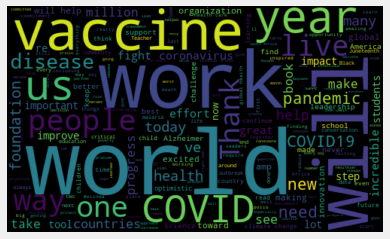

In [11]:
# Plot the word cloud
allwords=''.join([twts for twts in df['tweets']])
wordcloud=WordCloud(height=300,width=500,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# Create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

#Show the data frame
df

,tweets,Subjectivity,Polarity,Analysis
0,This honor is well deserved. COVID-19 is not j...,0.000000,0.000000,Neutral
1,"For the last 25 years, Dr. Firdausi Qadri, an ...",0.345833,0.000000,Neutral
2,I’m excited to see this kind of innovation. De...,0.737500,0.243750,Positive
3,The only way to eliminate the threat of COVID-...,0.872222,0.150000,Positive
4,Understanding this concept can help us measure...,0.100000,0.100000,Positive
...,...,...,...,...
195,One of the many awful things about watching so...,0.650000,0.125000,Positive
196,We have cut the number of child deaths in half...,0.213636,-0.049242,Negative
197,Buildings are one of the five areas where we n...,0.833333,0.166667,Positive
198,"A lot of work remains, but it’s exciting to se...",0.672727,0.263636,Positive


In [13]:
# Print all the positive tweets
j=1

sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+')'+sortedDF['tweets'][i])
    print()
    j=j+1

1)I’m excited to see this kind of innovation. Detecting and predicting outbreaks earlier is critical to preventing epidemics. 

2)The only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. By making sure poor countries are equipped to stop this disease, wealthy countries will help themselves and bring this crisis to an end sooner. 

3)Understanding this concept can help us measure our progress toward eliminating carbon emissions and serve as a guide to action. 

4)Developing and manufacturing vaccines won’t end the pandemic quickly unless we also deliver them equitably. Here is why it’s critical that vaccines are distributed in proportion to the global population:  

5)Great to see the UK commit vital funding to ensure COVID-19 vaccines are available for the world’s poorest people. PM 's plan will improve the way we prepare for future crises like this. 

6)After 20 years of stunning advances toward global goals to improve health and reduce poverty, the CO

In [14]:
# Print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['tweets'][i])
    print()
    j=j+1


1): What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

2)To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

3)Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

4): Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

5)Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

6): “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as

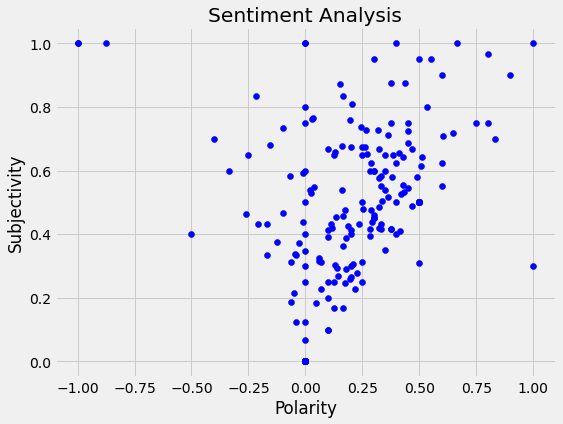

In [15]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
# Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['tweets']
round(ptweets.shape[0]/df.shape[0]*100,1)

71.0

In [18]:
# Get the percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['tweets']
round(ntweets.shape[0]/df.shape[0]*100,1)


13.0

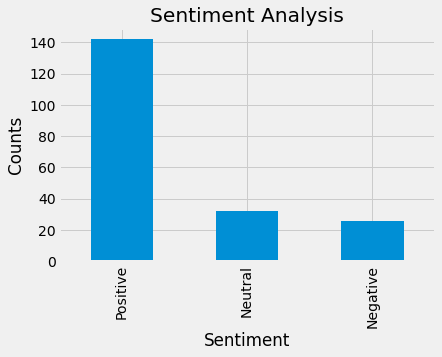

In [20]:
# Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()